In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [90]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

In [91]:
GDP = pd.read_csv('US real GDP - quarterly.csv', parse_dates = True, index_col = 'DATE')
GDP_start_index = '2001-01-01'
GDP_end_index = '2020-01-01'
GDP = GDP[GDP_start_index:GDP_end_index]
GDP

,GDPC1
DATE,
2001-01-01,13222.690
2001-04-01,13299.984
2001-07-01,13244.784
2001-10-01,13280.859
2002-01-01,13397.002
...,...
2019-01-01,18950.347
2019-04-01,19020.599
2019-07-01,19141.744


In [92]:
upsampled_GDP = GDP.resample('W').ffill()
upsampled_GDP.drop(upsampled_GDP.tail(1).index,inplace=True)
upsampled_GDP

,GDPC1
DATE,
2001-01-07,13222.690
2001-01-14,13222.690
2001-01-21,13222.690
2001-01-28,13222.690
2001-02-04,13222.690
...,...
2019-12-01,19253.959
2019-12-08,19253.959
2019-12-15,19253.959


In [93]:
sigma = upsampled_GDP.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/12), 991)
variations

array([-2.23120101e+02, -9.29349474e+02, -5.13879621e+02, -9.35463454e+02,
        1.30572835e+02, -6.21197217e+01,  3.17578590e+01,  1.06349565e+03,
        1.12599179e+02, -6.67424612e+02, -7.62894146e+01, -1.24046109e+03,
        6.36713863e+02, -4.90659462e+02,  1.74216641e+02, -6.37620391e+01,
       -6.26142541e+02, -2.37556222e+02, -5.02926317e+02, -3.81614741e+02,
        2.16321747e+02, -2.21621595e+01,  3.22325295e+02, -6.33555463e+02,
        7.95091050e+00, -4.22759680e+02,  1.89677771e+02,  2.57823889e+02,
       -5.94147559e+02, -1.46213757e+02,  3.72780491e+02,  5.14819269e+02,
       -2.76884417e+01, -3.29159262e+01,  4.16448256e+02,  3.76740996e+02,
       -2.78154320e+02, -2.58613773e+02,  4.72188282e+02,  4.92281049e+02,
       -5.33059950e+02, -2.50789736e+01,  2.93526223e+01, -6.54271068e+01,
        3.27457145e+02, -4.21135802e+02,  2.74009348e+02, -1.05589810e+03,
       -7.22367587e+02,  4.56880692e+02,  2.30485633e+02, -2.50665598e+02,
       -7.24486151e+01, -

In [94]:
upsampled_GDP_series = pd.DataFrame.to_numpy(upsampled_GDP).flatten()
upsampled_GDP_series = upsampled_GDP_series + variations
upsampled_GDP_series

array([12999.56989932, 12293.34052589, 12708.81037893, 12287.22654644,
       13353.26283535, 13160.57027835, 13254.447859  , 14286.18564721,
       13335.28917917, 12555.26538768, 13146.40058537, 11982.22891028,
       13936.69786344, 12809.32453846, 13474.20064091, 13236.22196087,
       12673.84145925, 13062.42777835, 12797.05768289, 12918.36925862,
       13516.30574726, 13277.82184055, 13622.30929489, 12666.42853689,
       13307.9349105 , 12822.02432047, 13434.4617709 , 13502.60788943,
       12650.63644079, 13098.5702431 , 13617.56449062, 13759.60326905,
       13217.09555826, 13211.86807379, 13661.23225576, 13621.52499644,
       12966.6296804 , 12986.17022701, 13716.97228155, 13773.14004915,
       12747.79905011, 13255.78002636, 13310.2116223 , 13215.43189325,
       13608.31614523, 12859.72319751, 13554.86834795, 12224.9609019 ,
       12558.49141258, 13737.73969193, 13511.34463252, 13030.1934023 ,
       13324.55338491, 13154.45474687, 13069.49100413, 12773.55953863,
      

In [95]:
upsampled_GDP['GDPC1']  = upsampled_GDP_series
upsampled_GDP

,GDPC1
DATE,
2001-01-07,12999.569899
2001-01-14,12293.340526
2001-01-21,12708.810379
2001-01-28,12287.226546
2001-02-04,13353.262835
...,...
2019-12-01,19477.309102
2019-12-08,19750.111124
2019-12-15,20106.390381


In [96]:
upsampled_GDP_01_08 = upsampled_GDP[:417]
upsampled_GDP_01_08

,GDPC1
DATE,
2001-01-07,12999.569899
2001-01-14,12293.340526
2001-01-21,12708.810379
2001-01-28,12287.226546
2001-02-04,13353.262835
...,...
2008-11-30,15451.903163
2008-12-07,15362.370407
2008-12-14,14770.914561


In [97]:
upsampled_GDP_09_19 = upsampled_GDP[417:]
upsampled_GDP_09_19

,GDPC1
DATE,
2009-01-04,14476.249822
2009-01-11,16075.155514
2009-01-18,15137.191645
2009-01-25,15155.344014
2009-02-01,15538.171293
...,...
2019-12-01,19477.309102
2019-12-08,19750.111124
2019-12-15,20106.390381


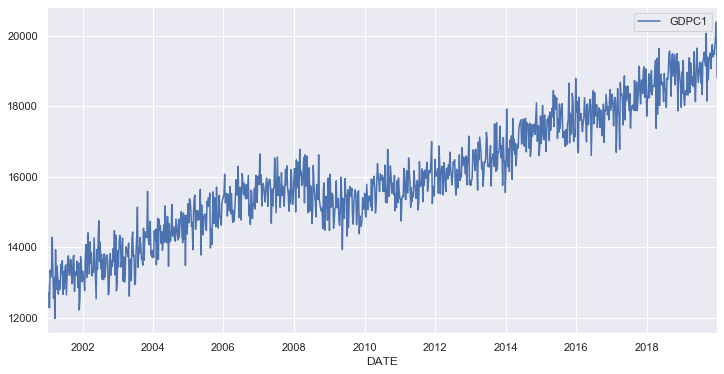

In [98]:
upsampled_GDP.plot.line()

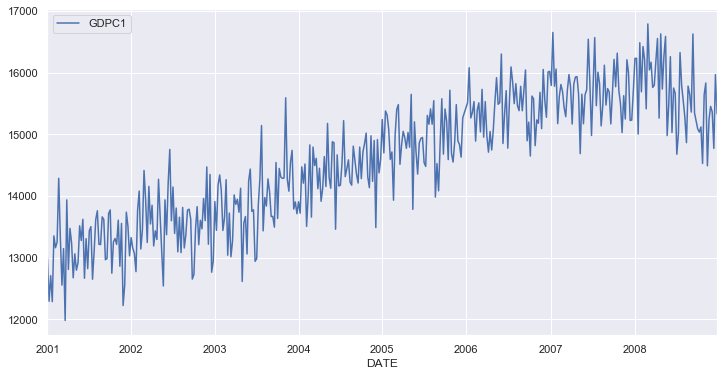

In [99]:
upsampled_GDP_01_08.plot.line()

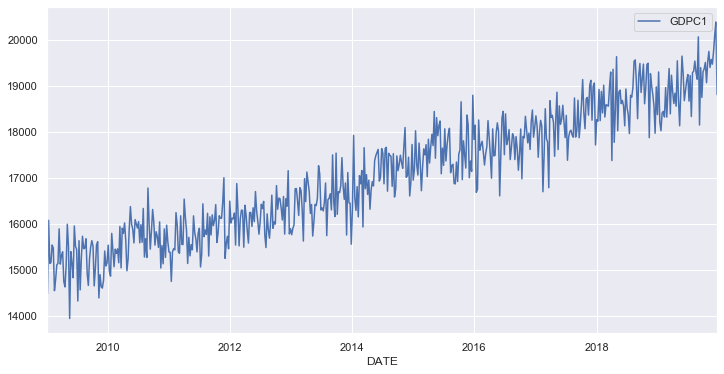

In [100]:
upsampled_GDP_09_19.plot.line()

In [102]:
upsampled_GDP_01_08.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/US_real_GDP_01_08.csv')

In [103]:
upsampled_GDP_09_19.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/US_real_GDP_09_19.csv')